In [24]:
import math

from scipy.io import arff
from operator import index

import numpy as np
from sklearn.neighbors import NearestNeighbors, KernelDensity
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import scipy.stats
from scipy.stats import expon, skew
from scipy import integrate
import seaborn as sns
import math
plt.rcParams['figure.figsize'] = [15, 7]

# 1

In [25]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t4-8k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df = pd.DataFrame(arff_file[0])

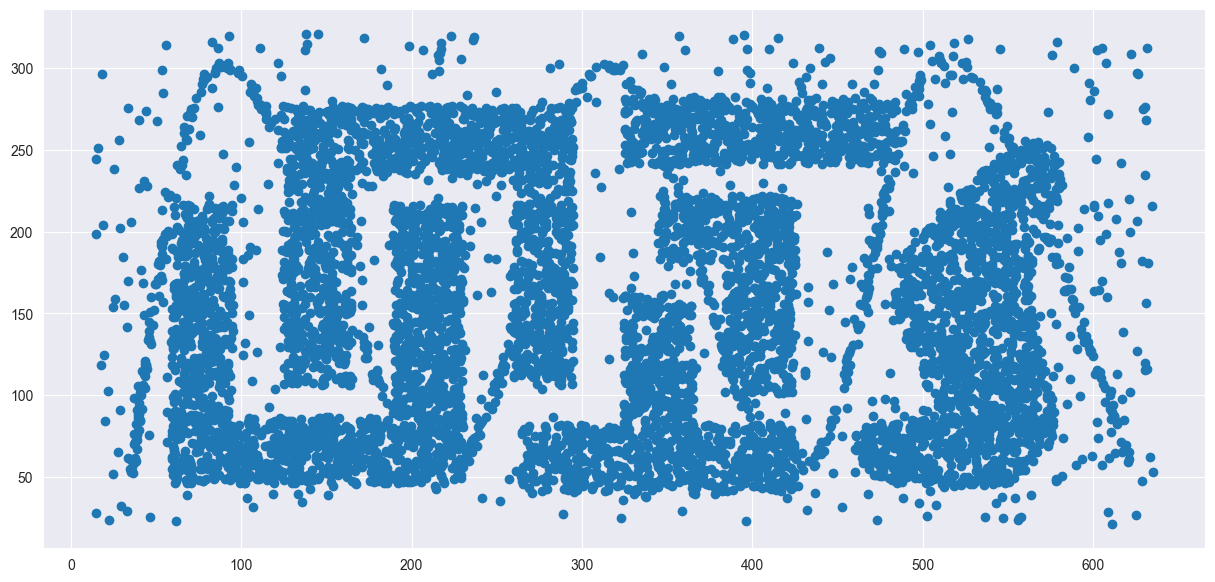

In [26]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.show()

In [27]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,35)

In [28]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum': # min + median + max
            arr += [x[1]+np.max(x)+np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'max2':
            arr += [x[-1]+x[-2]]
        elif median == 'medMax':
            arr += [np.median(x)+np.max(x)]
        elif median == 'min':
            arr += [x[1]]
            

    return arr

distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="medMax")

4.64566683234964


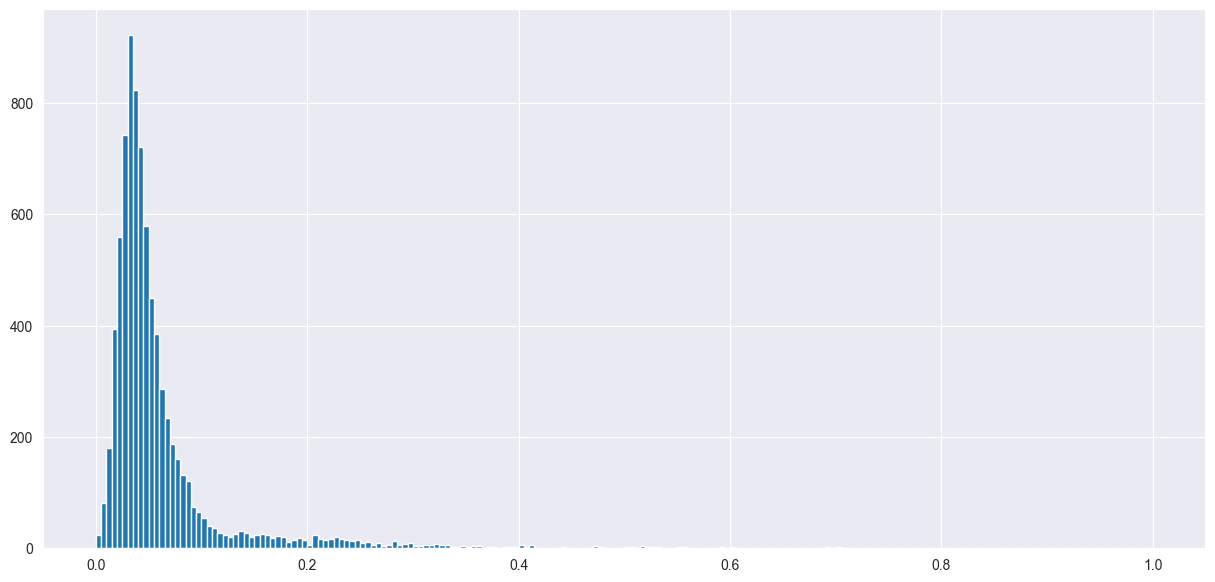

In [29]:
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
print(skew(arr))
plt.hist(arr,bins=200)
plt.show()

In [30]:
means = np.mean(arr)
inMean = 1/means

In [31]:
posNeg1 = []
spaceStep1 = np.linspace(.7,.99,20)
for e in spaceStep1:
    ker = -means*np.log(1-e)
    print(-means*np.log(1-.88))
    f = integrate.quad(lambda x: inMean*np.exp(-x*inMean), 0, ker)
    newArr = arr < ker
    print(f)
    posNeg1.append([(y[~newArr] == 6).sum(),(y[~newArr] != 6).sum()])

print(posNeg1)

0.1311881176869189
(0.7000000000000001, 7.771561172376096e-15)
0.1311881176869189
(0.7152631578947368, 7.941016265608357e-15)
0.1311881176869189
(0.7305263157894737, 8.110471358840617e-15)
0.1311881176869189
(0.7457894736842106, 8.279926452072878e-15)
0.1311881176869189
(0.7610526315789472, 8.449381545305137e-15)
0.1311881176869189
(0.7763157894736841, 8.618836638537398e-15)
0.1311881176869189
(0.7915789473684209, 8.788291731769659e-15)
0.1311881176869189
(0.806842105263158, 8.957746825001923e-15)
0.1311881176869189
(0.8221052631578946, 9.127201918234179e-15)
0.1311881176869189
(0.8373684210526317, 9.296657011466443e-15)
0.1311881176869189
(0.8526315789473685, 9.466112104698704e-15)
0.1311881176869189
(0.8678947368421053, 9.635567197930963e-15)
0.1311881176869189
(0.8831578947368423, 9.805022291163226e-15)
0.1311881176869189
(0.8984210526315789, 9.974477384395485e-15)
0.1311881176869189
(0.9136842105263159, 1.0143932477627747e-14)
0.1311881176869189
(0.9289473684210525, 1.0313387570860

[ True  True  True ...  True  True  True]


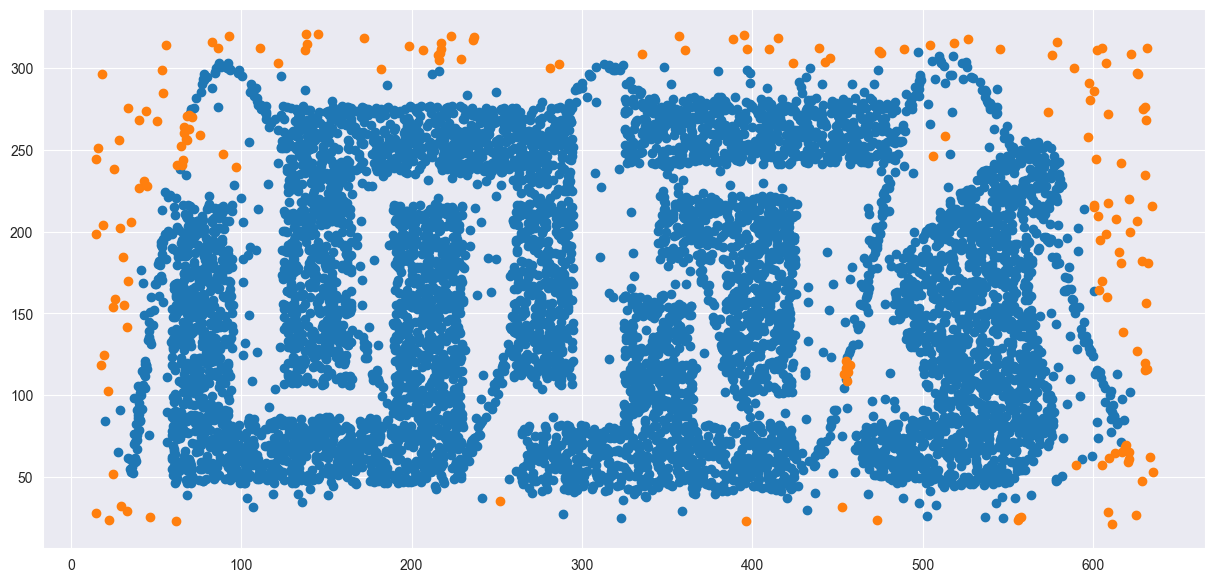

In [32]:

print(newArr)
plt.scatter(X[newArr,0],X[newArr,1])
plt.scatter(X[~newArr,0],X[~newArr,1])
plt.show()

(7830, 2) (170, 2)
170 0


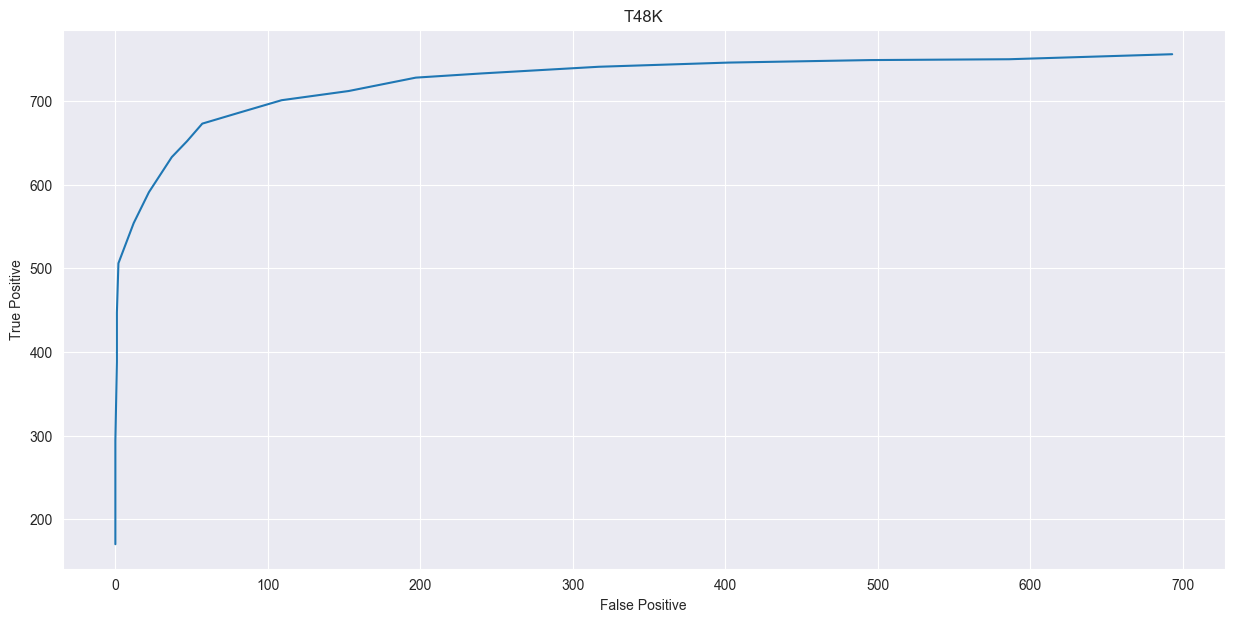

-502215.5


In [33]:
print(X[newArr].shape,X[~newArr].shape)
print((y[~newArr] == 6).sum(),(y[~newArr] != 6).sum())
posNeg1 = np.array(posNeg1)
plt.plot(posNeg1[:,1],posNeg1[:,0])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("T48K")
plt.show()
print(integrate.trapezoid(posNeg1[:,0],posNeg1[:,1]))

In [34]:
total2 = integrate.trapezoid(posNeg1[:,0], x=posNeg1[:,1] / (posNeg1[0][0]*posNeg1[0][1])) * -100
print(total2)
# 525254.5 / 550420 = 95.43

95.85948296265755


# 1

# 2

In [35]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t7-10k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df3 = pd.DataFrame(arff_file[0])
df3.tail()

,x,y,CLASS
9995,451.783997,372.544006,b'6'
9996,550.674988,327.447998,b'1'
9997,474.742004,161.518005,b'3'
9998,535.835022,375.765991,b'1'
9999,234.878006,181.878006,b'8'


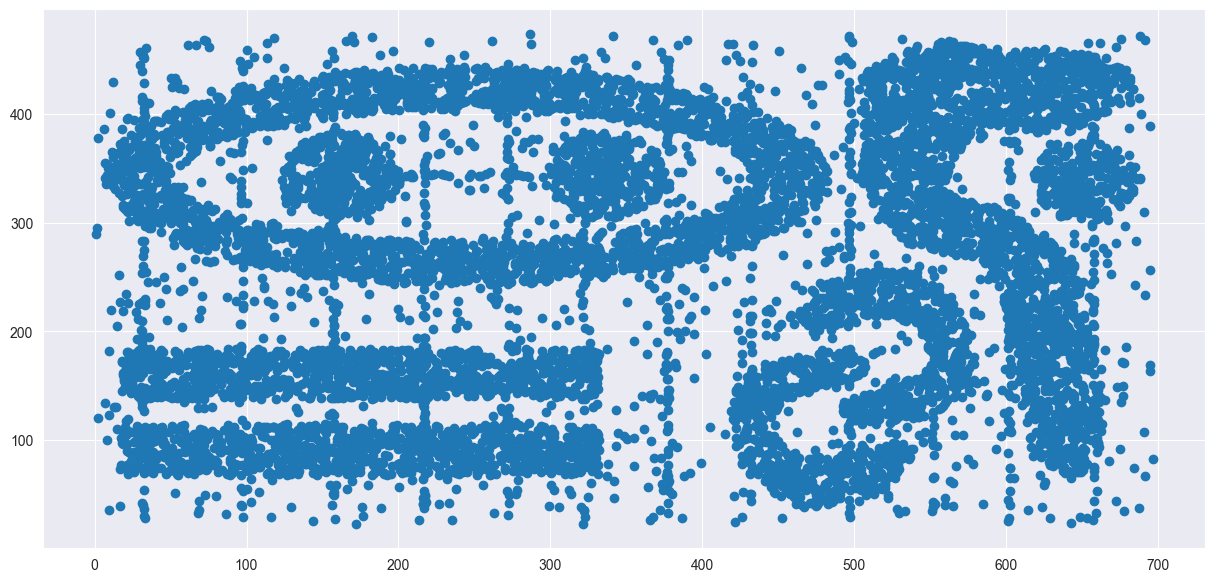

In [36]:
plt.scatter(df3['x'],df3['y'])
plt.show()

In [37]:
X = df3.iloc[:,:2].values
y = df3.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,35)

In [38]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr


distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="medMax")
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

0.25083038066882507
(0.7, 7.771561172376096e-15)
(8234, 2) (1766, 2)
791 975
0.25083038066882507
(0.7152631578947368, 7.941016265608357e-15)
(8373, 2) (1627, 2)
791 836
0.25083038066882507
(0.7305263157894738, 8.110471358840619e-15)
(8538, 2) (1462, 2)
790 672
0.25083038066882507
(0.7457894736842104, 8.279926452072877e-15)
(8660, 2) (1340, 2)
790 550
0.25083038066882507
(0.7610526315789472, 8.449381545305137e-15)
(8766, 2) (1234, 2)
788 446
0.25083038066882507
(0.7763157894736841, 8.618836638537398e-15)
(8884, 2) (1116, 2)
784 332
0.25083038066882507
(0.7915789473684212, 8.78829173176966e-15)
(8959, 2) (1041, 2)
780 261
0.25083038066882507
(0.8068421052631578, 8.95774682500192e-15)
(9036, 2) (964, 2)
773 191
0.25083038066882507
(0.8221052631578947, 9.12720191823418e-15)
(9092, 2) (908, 2)
770 138
0.25083038066882507
(0.8373684210526315, 9.296657011466442e-15)
(9137, 2) (863, 2)
764 99
0.25083038066882507
(0.8526315789473684, 9.466112104698702e-15)
(9184, 2) (816, 2)
751 65
0.2508303806

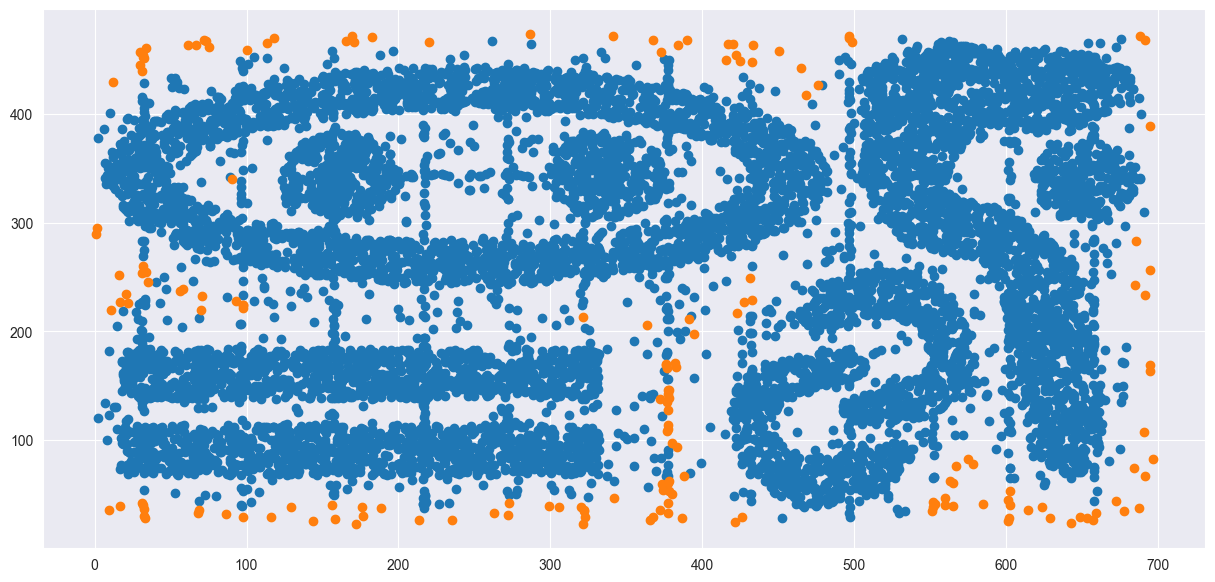

In [39]:
means = np.mean(arr)
inMean = 1 / means
posNeg = []
spaceStep = np.linspace(.7,.99,20)
for e in spaceStep:
    ker = -means * np.log(1 - e)
    print(-means * np.log(1 - .88))
    f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
    print(f)
    newArr = arr < ker
    print(X[newArr].shape, X[~newArr].shape)
    print((y[~newArr] == 9).sum(), (y[~newArr] != 9).sum())
    posNeg.append([(y[~newArr] == 9).sum(), (y[~newArr] != 9).sum()])
    y.max()
print(newArr)
print(posNeg)
plt.scatter(X[newArr, 0], X[newArr, 1])
plt.scatter(X[~newArr, 0], X[~newArr, 1])
plt.show()

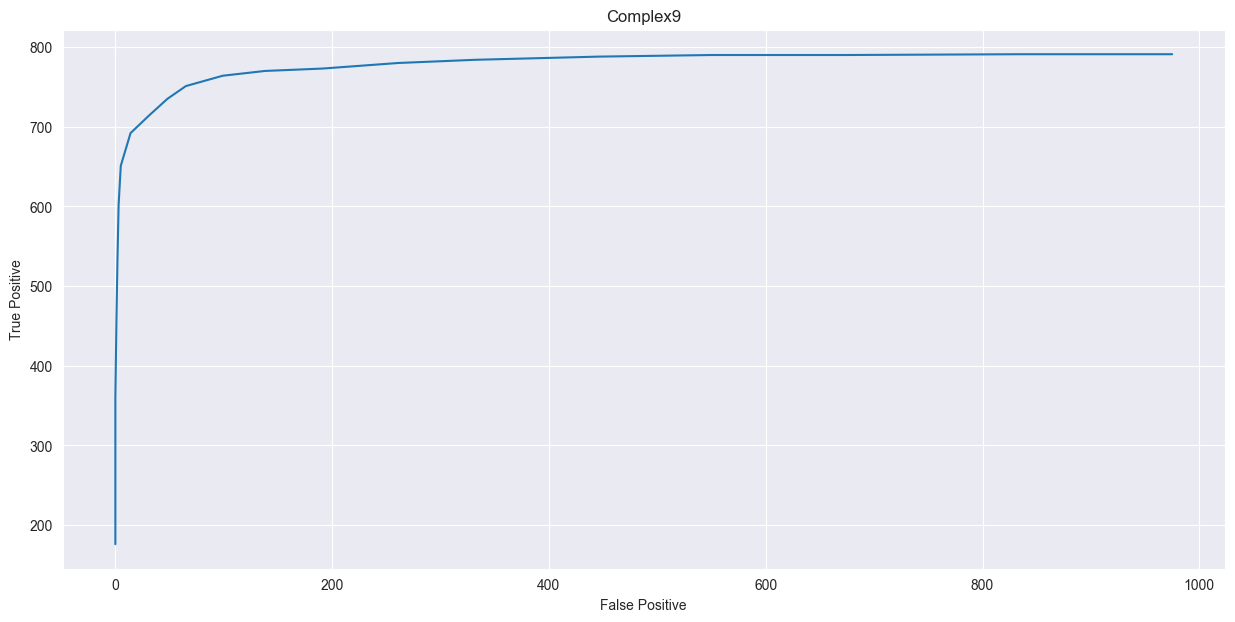

-759738.0


In [40]:
posNeg = np.array(posNeg)
plt.plot(posNeg[:,1], posNeg[:,0])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Complex9")
plt.show()
print(integrate.trapezoid(posNeg[:,0], x=posNeg[:,1]))

In [41]:
total2 = integrate.trapezoid(posNeg[:,0], x=posNeg[:,1] / (posNeg[0][0]*posNeg[0][1])) * -100
print(total2)
#824456
#~= 98.3%

98.51055139550715


# 2

# 3

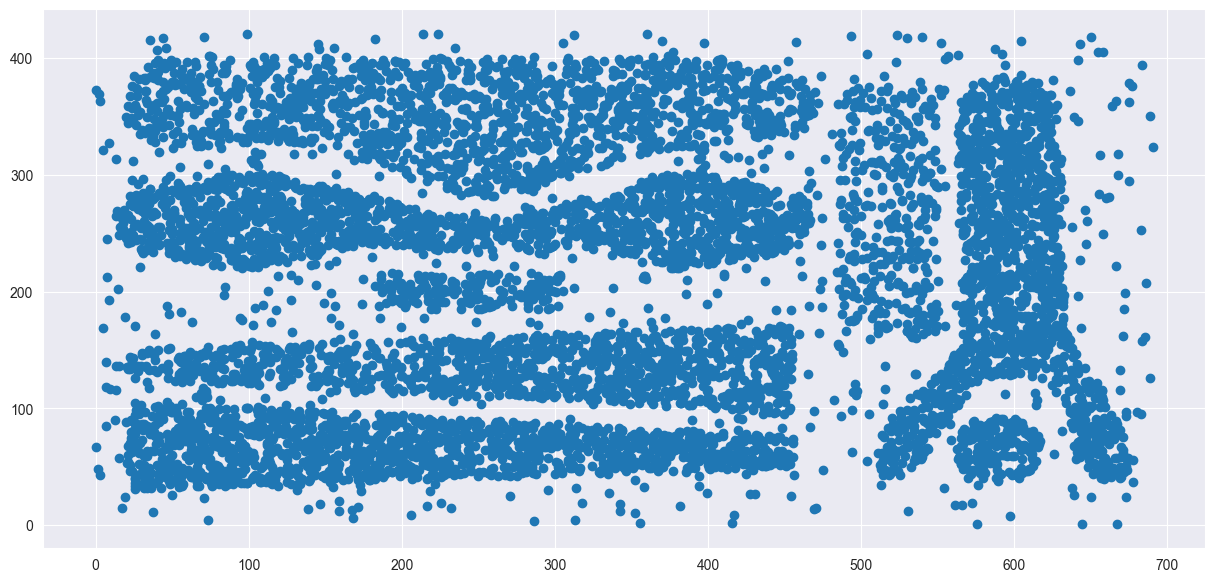

0.2695344932090582
(0.6999999999999998, 7.771561172376094e-15)
0.2695344932090582
(0.7152631578947368, 7.941016265608357e-15)
0.2695344932090582
(0.7305263157894737, 8.110471358840617e-15)
0.2695344932090582
(0.7457894736842106, 8.279926452072878e-15)
0.2695344932090582
(0.7610526315789474, 8.449381545305139e-15)
0.2695344932090582
(0.7763157894736842, 8.6188366385374e-15)
0.2695344932090582
(0.791578947368421, 8.78829173176966e-15)
0.2695344932090582
(0.806842105263158, 8.957746825001923e-15)
0.2695344932090582
(0.8221052631578947, 9.12720191823418e-15)
0.2695344932090582
(0.8373684210526315, 9.296657011466442e-15)
0.2695344932090582
(0.8526315789473684, 9.466112104698702e-15)
0.2695344932090582
(0.8678947368421052, 9.635567197930963e-15)
0.2695344932090582
(0.8831578947368423, 9.805022291163226e-15)
0.2695344932090582
(0.8984210526315789, 9.974477384395485e-15)
0.2695344932090582
(0.913684210526316, 1.0143932477627749e-14)
0.2695344932090582
(0.9289473684210526, 1.0313387570860006e-1

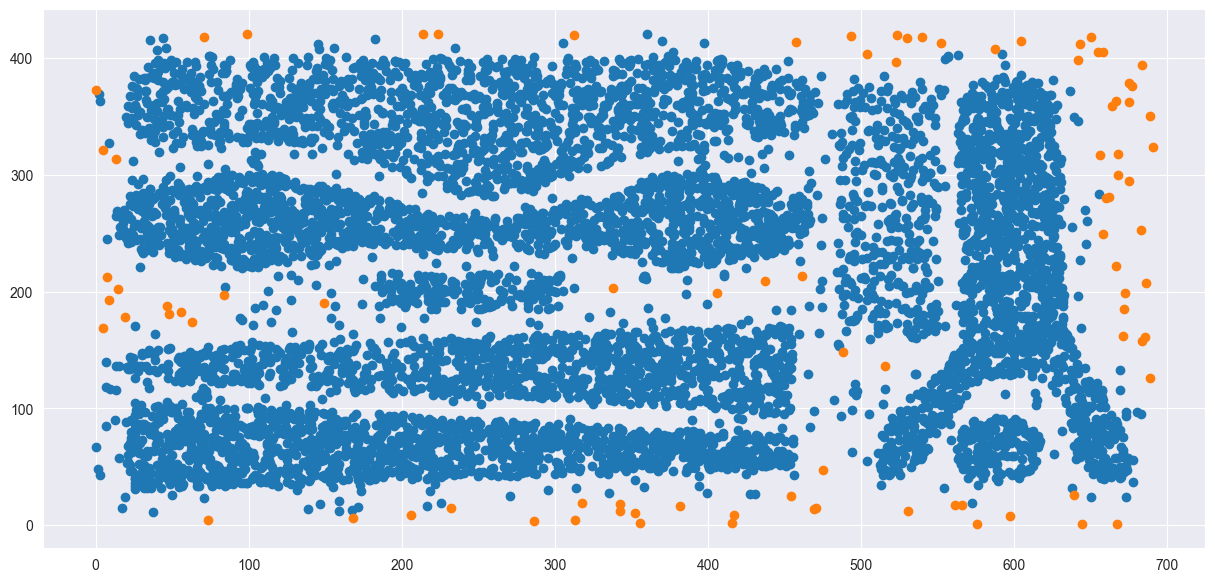

In [42]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t8-8k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df3 = pd.DataFrame(arff_file[0])
df3.tail()
plt.scatter(df3['x'], df3['y'])
plt.show()
X = df3.iloc[:, :2].values
y = df3.iloc[:, 2].values
le = LabelEncoder()
y = le.fit_transform(y)


def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist


knn, distReturn = main(X, y, 10)


def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr


distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="medMax")
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
means = np.mean(arr)
inMean = 1 / means
posNeg2 = []
spaceStep2 = np.linspace(.7,.99,20)
for e in spaceStep2:
    ker = -means * np.log(1 - e)
    print(-means * np.log(1 - .92))
    f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
    print(f)
    newArr = arr < ker
    posNeg2.append([(y[~newArr] == 8).sum(), (y[~newArr] != 8).sum()])
    
print(newArr)
plt.scatter(X[newArr, 0], X[newArr, 1])
plt.scatter(X[~newArr, 0], X[~newArr, 1])
plt.show()

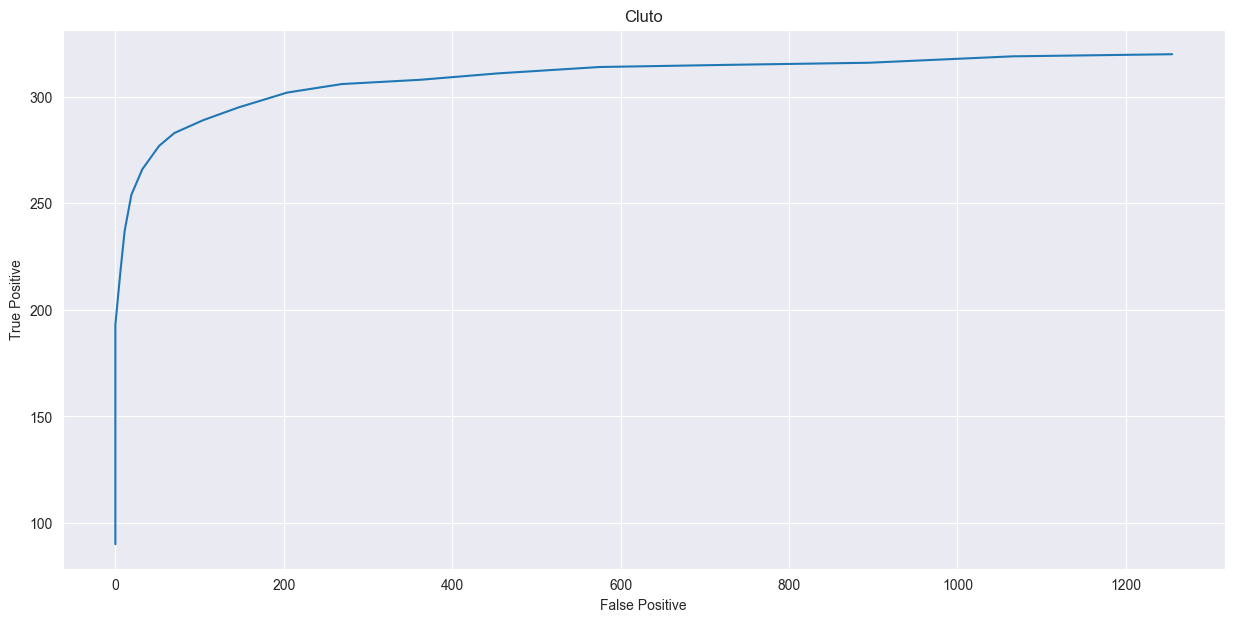

-387572.0


In [43]:
posNeg2 = np.array(posNeg2)
plt.plot(posNeg2[:,1], posNeg2[:,0])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Cluto")
plt.show()
print(integrate.trapezoid(posNeg2[:,0], x=posNeg2[:,1]))

In [44]:
total2 = integrate.trapezoid(posNeg2[:,0], x=posNeg2[:,1] / (posNeg2[0][0]*posNeg2[0][1])) * -100
print(total2)
"""
print(X[newArr].shape, X[~newArr].shape)
print((y[~newArr] == 8).sum(), (y[~newArr] != 8).sum())
print((y==8).sum())
"""

96.5069721115538


'\nprint(X[newArr].shape, X[~newArr].shape)\nprint((y[~newArr] == 8).sum(), (y[~newArr] != 8).sum())\nprint((y==8).sum())\n'

# Hepa

In [45]:
arff_file = arff.loadarff('./real/Hepatitis_withoutdupl_norm_16.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])
df4.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,...,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,AlbuMin,ProTime,Histology,outlier,id
0,0.269231,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.133333,0.271654,0.034483,0.655172,0.75,0.0,b'no',1.0
1,0.365385,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.222222,0.204724,0.039409,0.793103,0.85,0.0,b'no',2.0
2,0.230769,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.155556,0.129921,0.578818,0.551724,0.54,0.0,b'no',3.0
3,0.403846,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.133333,0.216535,0.113300,0.620690,0.52,0.0,b'no',4.0
4,0.192308,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.422222,0.122047,0.320197,0.965517,0.78,0.0,b'no',5.0


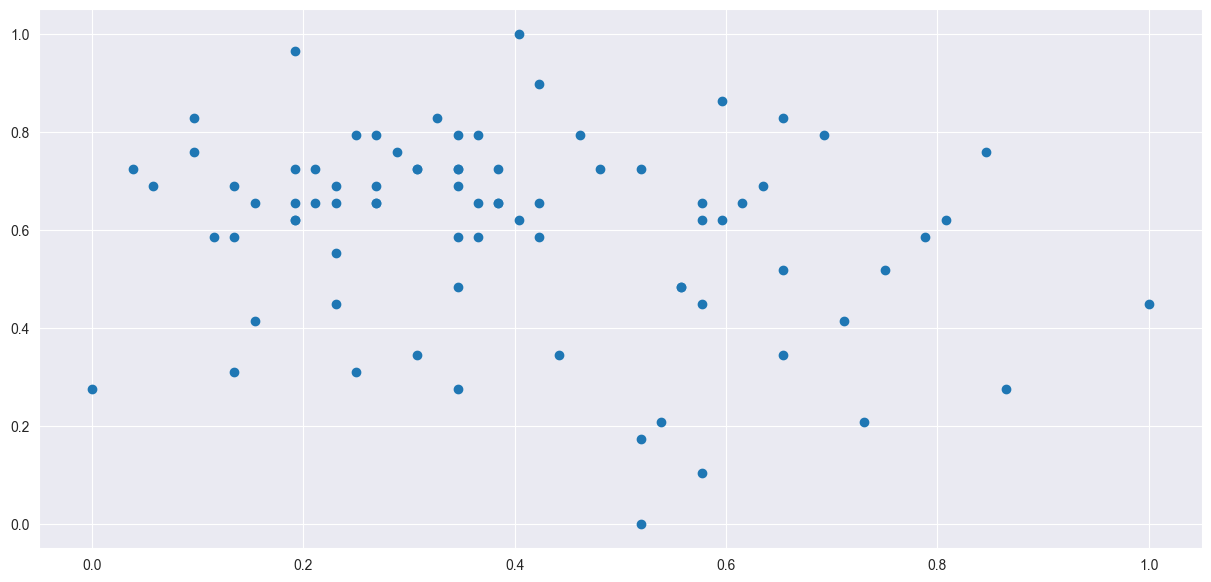

In [46]:
plt.scatter(df4['Age'], df4['AlbuMin'])
plt.show()

1.352244841332422
(0.7, 7.771561172376096e-15)
1.352244841332422
(0.7152631578947368, 7.941016265608357e-15)
1.352244841332422
(0.7305263157894738, 8.110471358840619e-15)
1.352244841332422
(0.7457894736842106, 8.279926452072878e-15)
1.352244841332422
(0.7610526315789474, 8.449381545305139e-15)
1.352244841332422
(0.7763157894736843, 8.6188366385374e-15)
1.352244841332422
(0.7915789473684212, 8.78829173176966e-15)
1.352244841332422
(0.8068421052631579, 8.957746825001922e-15)
1.352244841332422
(0.8221052631578946, 9.127201918234179e-15)
1.352244841332422
(0.8373684210526314, 9.29665701146644e-15)
1.352244841332422
(0.8526315789473683, 9.466112104698702e-15)
1.352244841332422
(0.8678947368421054, 9.635567197930965e-15)
1.352244841332422
(0.883157894736842, 9.805022291163224e-15)
1.352244841332422
(0.8984210526315791, 9.974477384395488e-15)
1.352244841332422
(0.9136842105263159, 1.0143932477627747e-14)
1.352244841332422
(0.9289473684210526, 1.0313387570860006e-14)
1.352244841332422
(0.94421

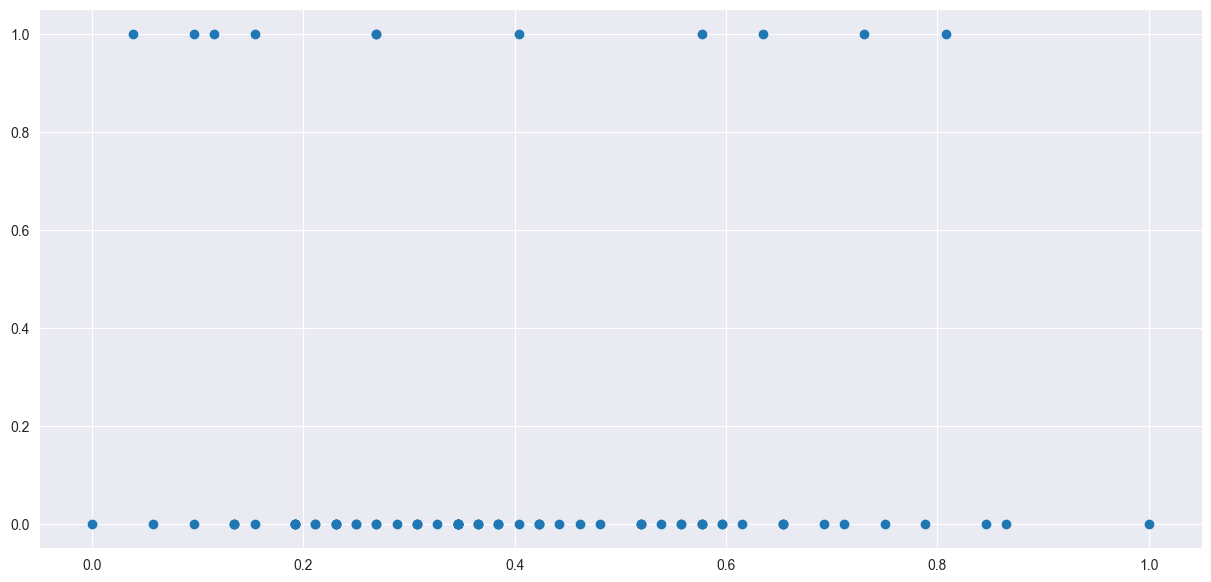

In [71]:
X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)


def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist


knn, distReturn = main(X, y, 2)


def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr


distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="medMax")
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
means = np.mean(arr)
inMean = 1 / means
posNeg4 = []
spaceStep4 = np.linspace(.7,.99,20)
for e in spaceStep4:
    ker = -means * np.log(1 - e)
    print(-means * np.log(1 - .92))
    f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
    newArr = arr < ker
    posNeg4.append([(y[~newArr] == 1).sum(), (y[~newArr] != 1).sum()])

plt.scatter(X[newArr, 0], X[newArr, 1])
plt.scatter(X[~newArr, 0], X[~newArr, 1])
plt.show()

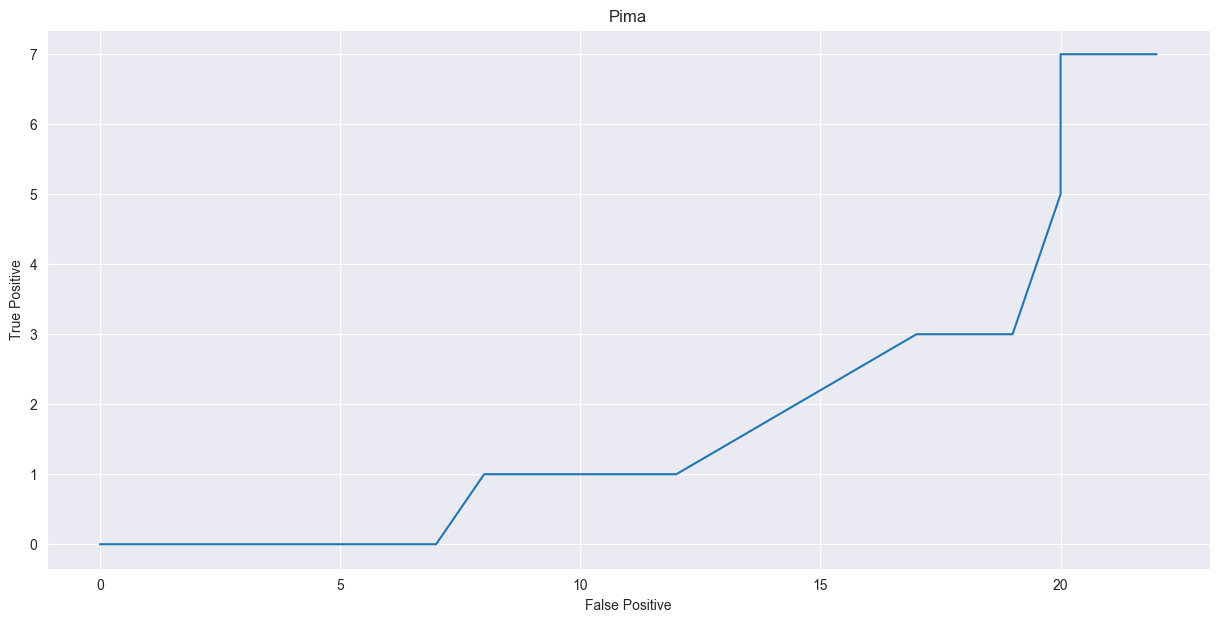

-38.5


In [72]:
posNeg4 = np.array(posNeg4)
plt.plot(posNeg4[:,1], posNeg4[:,0])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Pima")
plt.show()
print(integrate.trapezoid(posNeg4[:,0], x=posNeg4[:,1]))

In [73]:
total4 = integrate.trapezoid(posNeg4[:,0], x=posNeg4[:,1] / (posNeg4[0][0]*posNeg4[0][1])) * -100
print(total4)

25.0
